In [1]:
from glob import glob
import pandas as pd
from kid_readout.analysis import resonator, plot_resonator
from notebooks.library import display
#display.hide_code()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [9]:
def load_s2p_re_im(filename):
    f_GHz, S11RE, S11IM, S21RE, S21IM, S12RE, S12IM, S22RE, S22IM = np.loadtxt(filename, unpack=True, skiprows=23)
    
    df = pd.DataFrame.from_dict({'f': 1e9 * f_GHz,
                                 's11': S11RE + 1j * S11IM,
                                 's21': S21RE + 1j * S21IM,
                                 's12': S12RE + 1j * S12IM,
                                 's22': S22RE + 1j * S22IM})
    return df


def fit_resonators(dfs, offset=0.4e-3):
    rs = []
    for df in dfs:
        f_center = df.f.mean()
        mask = np.array((f_center * (1 - offset) < df.f) & (df.f < f_center * (1 + offset)))
        rs.append(resonator.Resonator(np.array(df.f), np.array(df.s21), mask=mask))
    return rs

In [7]:
mag_up_directory = '/Users/daniel/Johnson+Miller/mkid/dual-pol/jpl/cooldown_2016-02-05/'

In [8]:
mag_up = [load_s2p_re_im(f) for f in glob(mag_up_directory + '2016-02-08_????_MHz.s2p')]
mag_up_four = load_s2p_re_im(mag_up_directory + '2016-02-08_1263_MHz_four.s2p')

In [11]:
rs_mag_up = fit_resonators(mag_up)

In [17]:
mag_up_color = 'blue'

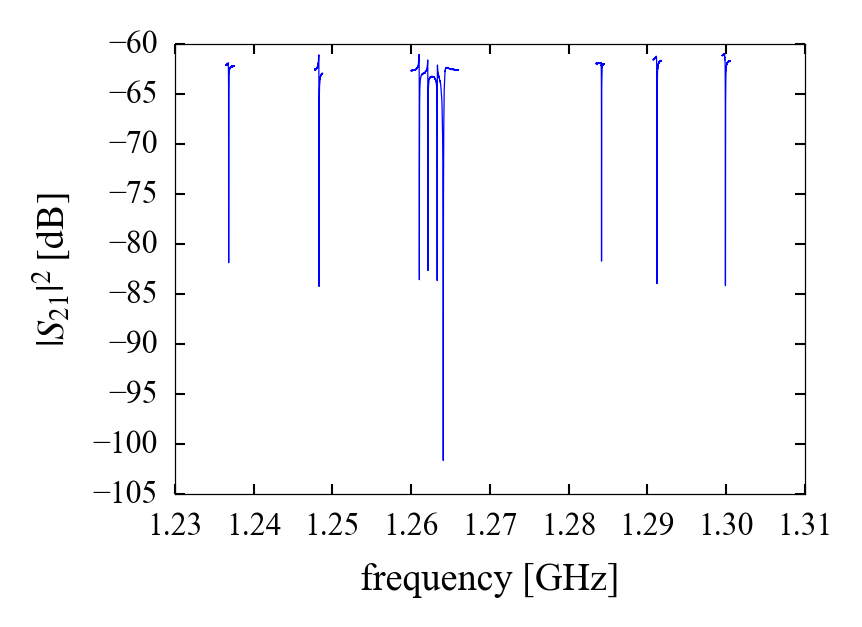

In [21]:
fig, ax = plt.subplots()

for df in mag_up:
    ax.plot(1e-9 * df.f,
            20 * np.log10(np.abs(df.s21)),
            color=mag_up_color)
    
ax.plot(1e-9 * mag_up_four.f,
        20 * np.log10(np.abs(mag_up_four.s21)),
        color=mag_up_color)

#handles, labels = ax.get_legend_handles_labels()
#ax.legend((handles[0], handles[len(no_mg)]), ('no Metglas', 'Metglas'), loc='best')

ax.set_xlabel('frequency [GHz]')
ax.set_ylabel(r'$|S_{21}|^2 \; [\mathrm{dB}]$');

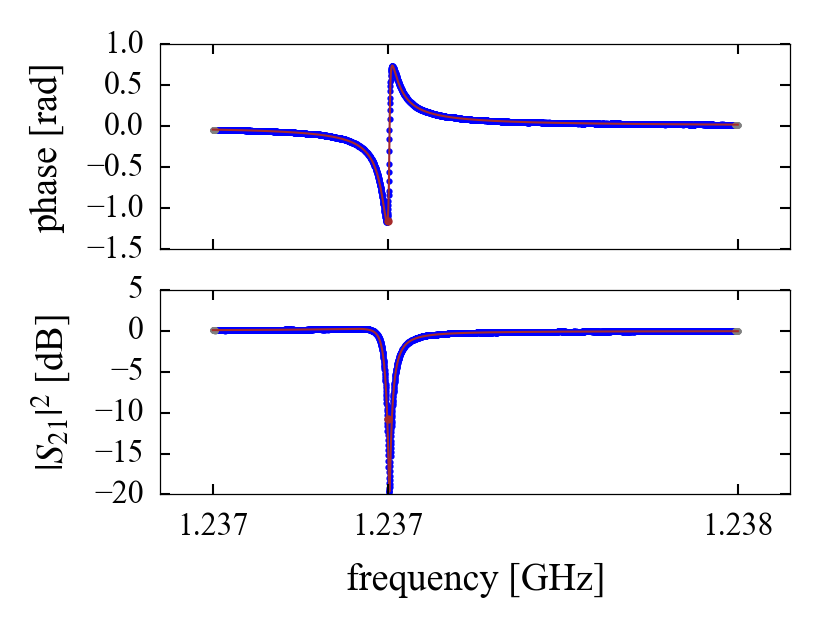

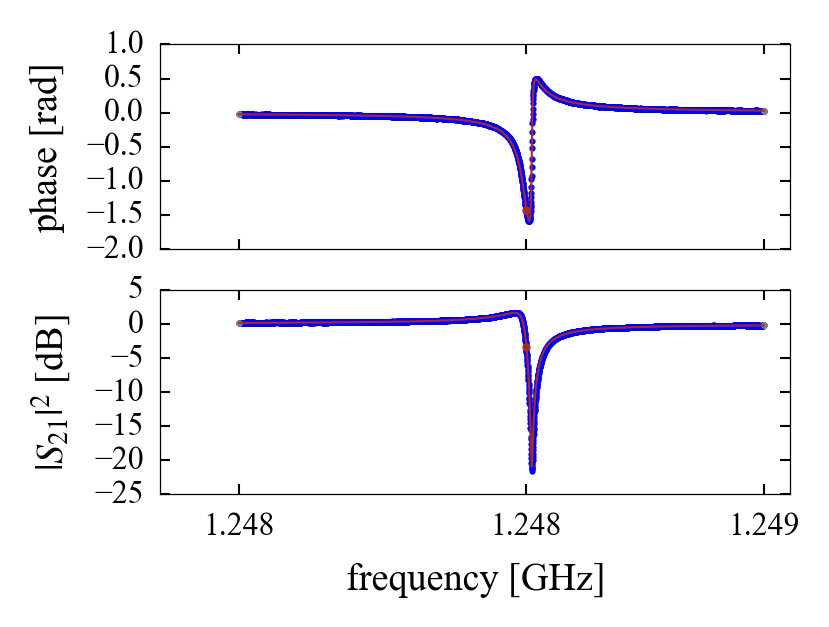

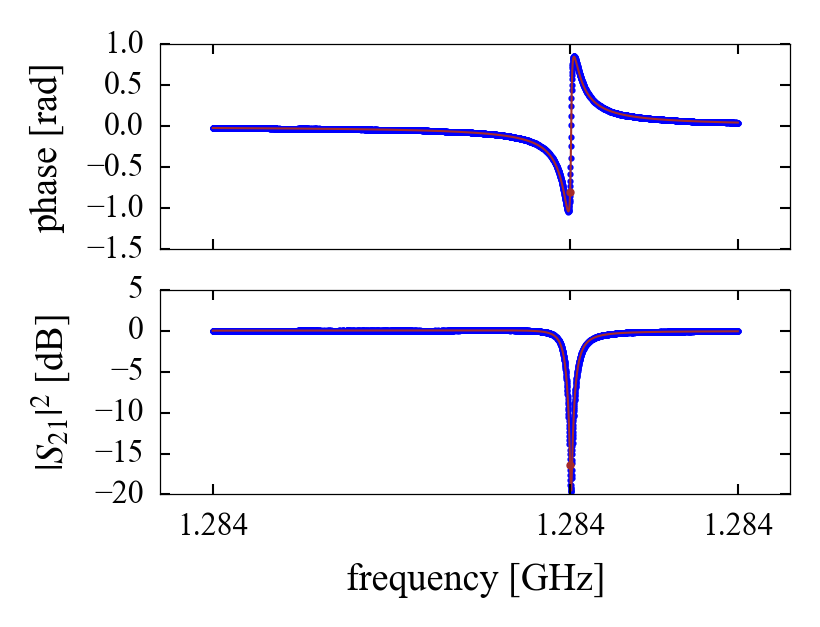

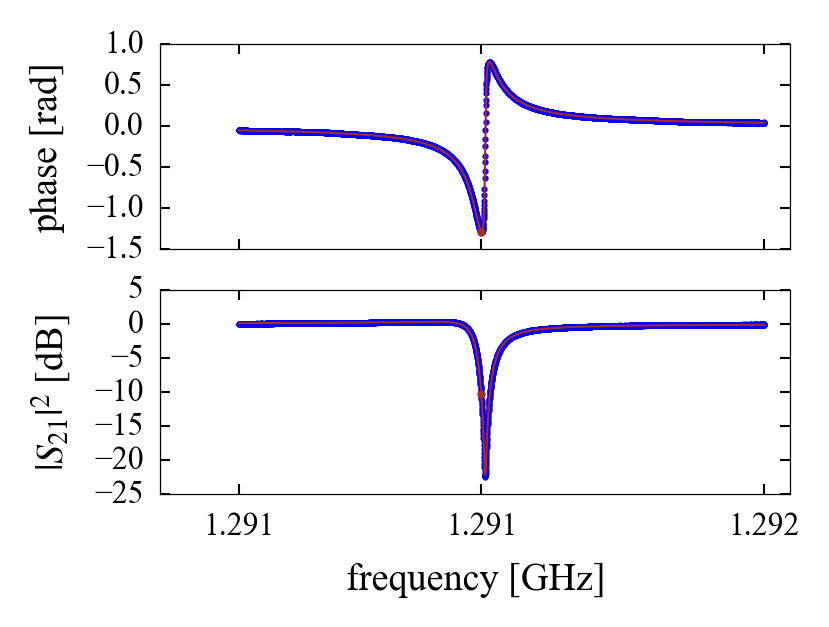

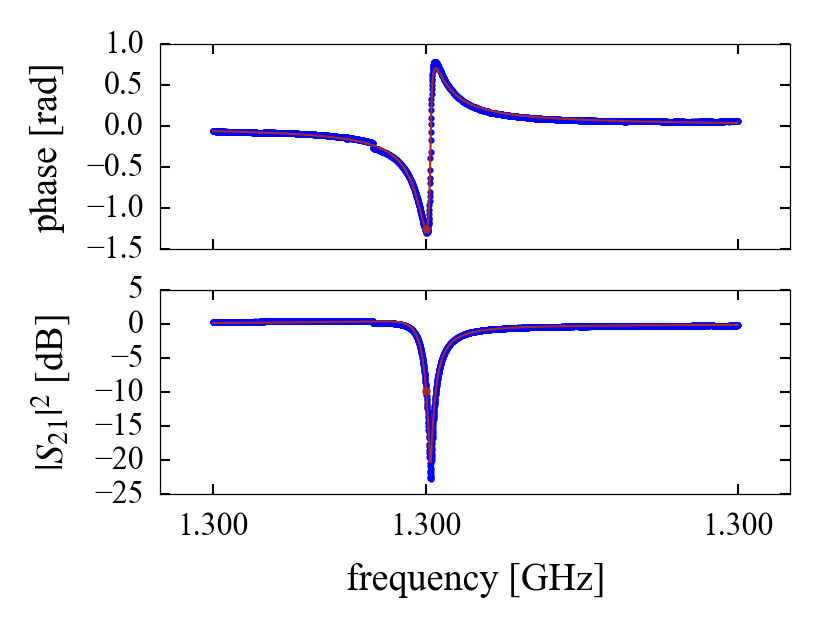

In [12]:
for r in rs_mag_up:
    plot_resonator.amplitude_and_phase(r, normalize_s21=True, freq_scale=1e-9, xlabel='frequency [GHz]')

In [14]:
[r.Q_i for r in rs_mag_up]

[386262.11228686589,
 379398.98843748902,
 377727.13903165684,
 325626.19491860725,
 241521.30156858967]

In [16]:
[r.Q_e_real for r in rs_mag_up]

[43068.799957420524,
 29326.685074386183,
 43882.756570208236,
 25580.92991954719,
 24333.469666611039]